In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from num2words import num2words
from bs4 import BeautifulSoup
import re
import unidecode
from string import punctuation
import nltk
from nltk.corpus import stopwords
from emoticons_list import EMOTICONS_EMO
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk import tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report
import pickle
sns.set(rc={'figure.figsize':(7,8)})

In [2]:
data = pd.read_csv('cyberbullying_tweets.csv')
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
data.shape

(47692, 2)

In [4]:
data.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [5]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [6]:
data['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

<AxesSubplot:xlabel='cyberbullying_type', ylabel='count'>

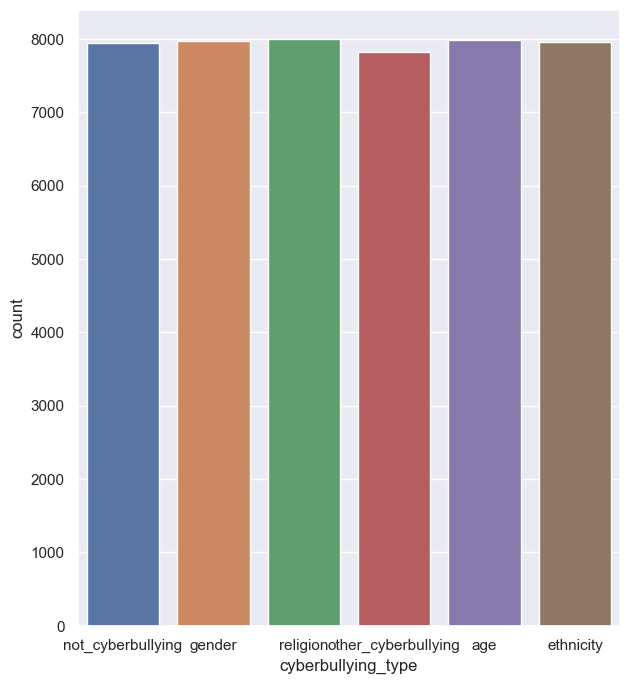

In [7]:
sns.countplot(x = 'cyberbullying_type', data = data)

In [8]:
def lower_case_convertion(text):
    lower_text = text.lower()
    return lower_text

In [9]:
data['tweet_text'] = data['tweet_text'].apply(lower_case_convertion)
data['tweet_text'].head()

0    in other words #katandandre, your food was cra...
1    why is #aussietv so white? #mkr #theblock #ima...
2    @xochitlsuckkks a classy whore? or more red ve...
3    @jason_gio meh. :p  thanks for the heads up, b...
4    @rudhoeenglish this is an isis account pretend...
Name: tweet_text, dtype: object

In [10]:
def remove_punctuation(text):
    """
    Return :- String after removing punctuations
    Input :- String
    Output :- String
    """
    return text.translate(str.maketrans('', '', punctuation))

In [11]:
data['tweet_text'] = data['tweet_text'].apply(remove_punctuation)
data['tweet_text'].head()

0    in other words katandandre your food was crapi...
1    why is aussietv so white mkr theblock imaceleb...
2    xochitlsuckkks a classy whore or more red velv...
3    jasongio meh p  thanks for the heads up but no...
4    rudhoeenglish this is an isis account pretendi...
Name: tweet_text, dtype: object

In [12]:
def numtowords(text):
    """
    Return :- text which have all numbers or integers in the form of words
    Input :- string
    Output :- string
    """
    # splitting text into words with space
    after_spliting = text.split()

    for index in range(len(after_spliting)):
        if after_spliting[index].isdigit():
            after_spliting[index] = num2words(after_spliting[index])

    # joining list into string with space
    numbers_to_words = ' '.join(after_spliting)
    return numbers_to_words

In [13]:
data['tweet_text'] = data['tweet_text'].apply(numtowords)
data['tweet_text'].head()

0    in other words katandandre your food was crapi...
1    why is aussietv so white mkr theblock imaceleb...
2    xochitlsuckkks a classy whore or more red velv...
3    jasongio meh p thanks for the heads up but not...
4    rudhoeenglish this is an isis account pretendi...
Name: tweet_text, dtype: object

In [14]:
def remove_html_tags_beautifulsoup(text):
    """
    Return :- String without Html tags
    input :- String
    Output :- String
    """
    parser = BeautifulSoup(text, "html.parser")
    without_html = parser.get_text(separator = " ")
    return without_html

In [15]:
data['tweet_text'] = data['tweet_text'].apply(remove_html_tags_beautifulsoup)
data['tweet_text'].head()

0    in other words katandandre your food was crapi...
1    why is aussietv so white mkr theblock imaceleb...
2    xochitlsuckkks a classy whore or more red velv...
3    jasongio meh p thanks for the heads up but not...
4    rudhoeenglish this is an isis account pretendi...
Name: tweet_text, dtype: object

In [16]:
def remove_urls(text):
    """
    Return :- String without URLs
    input :- String
    Output :- String
    """
    url_pattern = r'https?://\S+|www\.\S+'
    without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
    return without_urls

In [17]:
data['tweet_text'] = data['tweet_text'].apply(remove_urls)
data['tweet_text'].head()

0    in other words katandandre your food was crapi...
1    why is aussietv so white mkr theblock imaceleb...
2    xochitlsuckkks a classy whore or more red velv...
3    jasongio meh p thanks for the heads up but not...
4    rudhoeenglish this is an isis account pretendi...
Name: tweet_text, dtype: object

In [18]:
def accented_to_ascii(text):
    """
    Return :- text after converting accented characters
    Input :- string
    Output :- string
    """
    # apply unidecode function on text to convert
    # accented characters to ASCII values
    text = unidecode.unidecode(text)
    return text

In [19]:
data['tweet_text'] = data['tweet_text'].apply(accented_to_ascii)
data['tweet_text'].head()

0    in other words katandandre your food was crapi...
1    why is aussietv so white mkr theblock imaceleb...
2    xochitlsuckkks a classy whore or more red velv...
3    jasongio meh p thanks for the heads up but not...
4    rudhoeenglish this is an isis account pretendi...
Name: tweet_text, dtype: object

In [20]:
def remove_extra_spaces(text):
    """
    Return :- string after removing extra whitespaces
    Input :- String
    Output :- String
    """
    space_pattern = r'\s+'
    without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
    return without_space

In [21]:
data['tweet_text'] = data['tweet_text'].apply(remove_extra_spaces)
data['tweet_text'].head()

0    in other words katandandre your food was crapi...
1    why is aussietv so white mkr theblock imaceleb...
2    xochitlsuckkks a classy whore or more red velv...
3    jasongio meh p thanks for the heads up but not...
4    rudhoeenglish this is an isis account pretendi...
Name: tweet_text, dtype: object

In [22]:
def remove_single_char(text):
    """
    Return :- string after removing single characters
    Input :- string
    Output:- string
    """
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [23]:
data['tweet_text'] = data['tweet_text'].apply(remove_single_char)
data['tweet_text'].head()

0    in other words katandandre your food was crapi...
1    why is aussietv so white mkr theblock imaceleb...
2    xochitlsuckkks classy whore or more red velvet...
3    jasongio meh thanks for the heads up but not t...
4    rudhoeenglish this is an isis account pretendi...
Name: tweet_text, dtype: object

In [24]:
stop = stopwords.words('english')
data['tweet_text'] = data['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [25]:
# convert emo_unicode to unicode_emo
UNICODE_EMO = {v: k for k, v in EMOTICONS_EMO.items()}

def emoji_words(text):
    for emot in UNICODE_EMO:
        emoji_pattern = r'('+emot+')'
        # replace
        emoji_words = UNICODE_EMO[emot]
        replace_text = emoji_words.replace(",","")
        replace_text = replace_text.replace(":","")
        replace_text_list = replace_text.split()
        emoji_name = '_'.join(replace_text_list)
        text = re.sub(emoji_pattern, emoji_name, text)
    return text


In [26]:
data['tweet_text'] = data['tweet_text'].apply(emoji_words)
data['tweet_text'].head()

0              words katandandre food crapilicious mkr
1    aussietv white mkr theblock imacelebrityau tod...
2      xochitlsuckkks classy whore red velvet cupcakes
3    jasongio meh thanks heads concerned another an...
4    rudhoeenglish isis account pretending kurdish ...
Name: tweet_text, dtype: object

In [27]:
lemma = WordNetLemmatizer()
def lemmatization(text):

    # word tokenization
    tokens = word_tokenize(text)

    for index in range(len(tokens)):
        # lemma word
        lemma_word = lemma.lemmatize(tokens[index])
        tokens[index] = lemma_word

    return ' '.join(tokens)

In [28]:
data['tweet_text']=data['tweet_text'].apply(lemmatization)

In [29]:
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'cyan')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

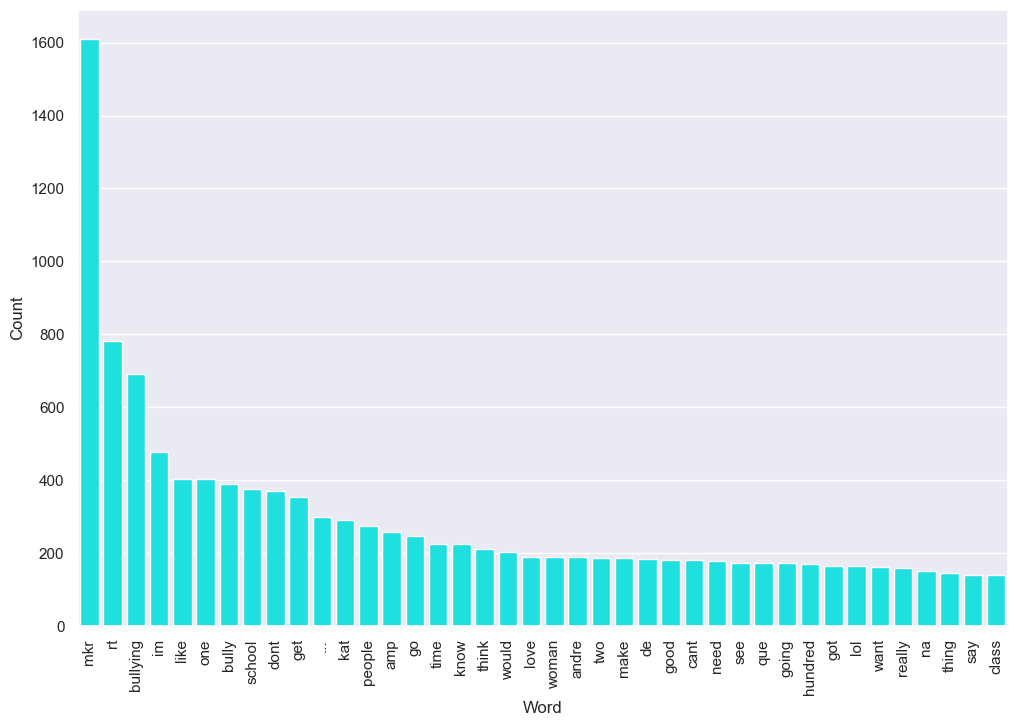

In [30]:
counter(data[data["cyberbullying_type"] == "not_cyberbullying"], "tweet_text", 40)

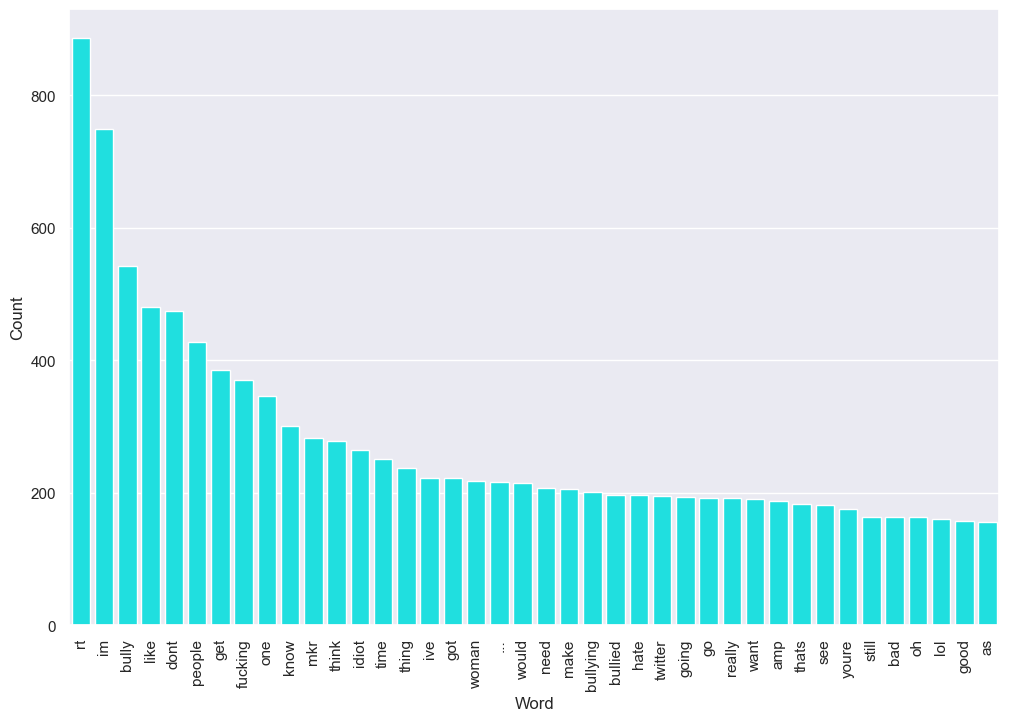

In [31]:
counter(data[data["cyberbullying_type"] == "other_cyberbullying"], "tweet_text", 40)

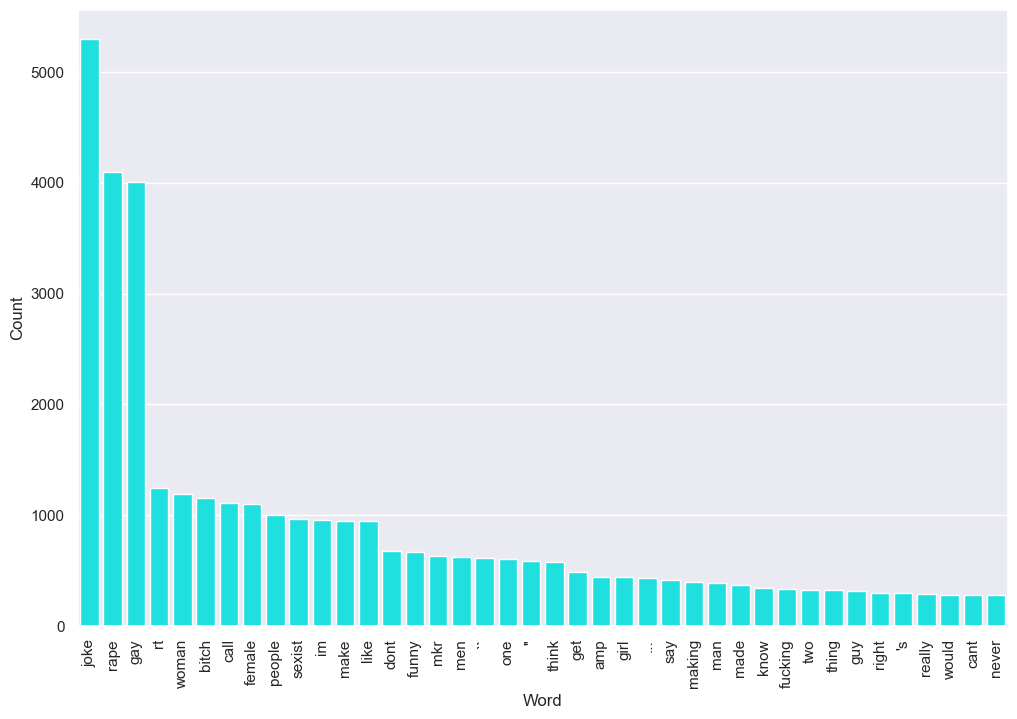

In [32]:
counter(data[data["cyberbullying_type"] == "gender"], "tweet_text", 40)

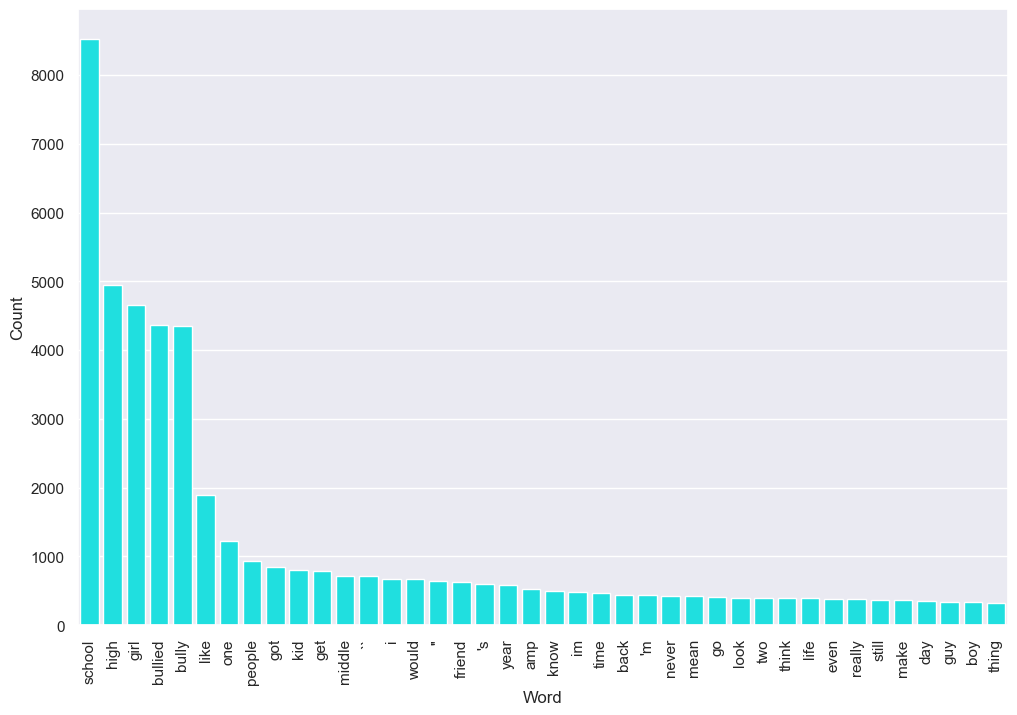

In [33]:
counter(data[data["cyberbullying_type"] == "age"], "tweet_text", 40)

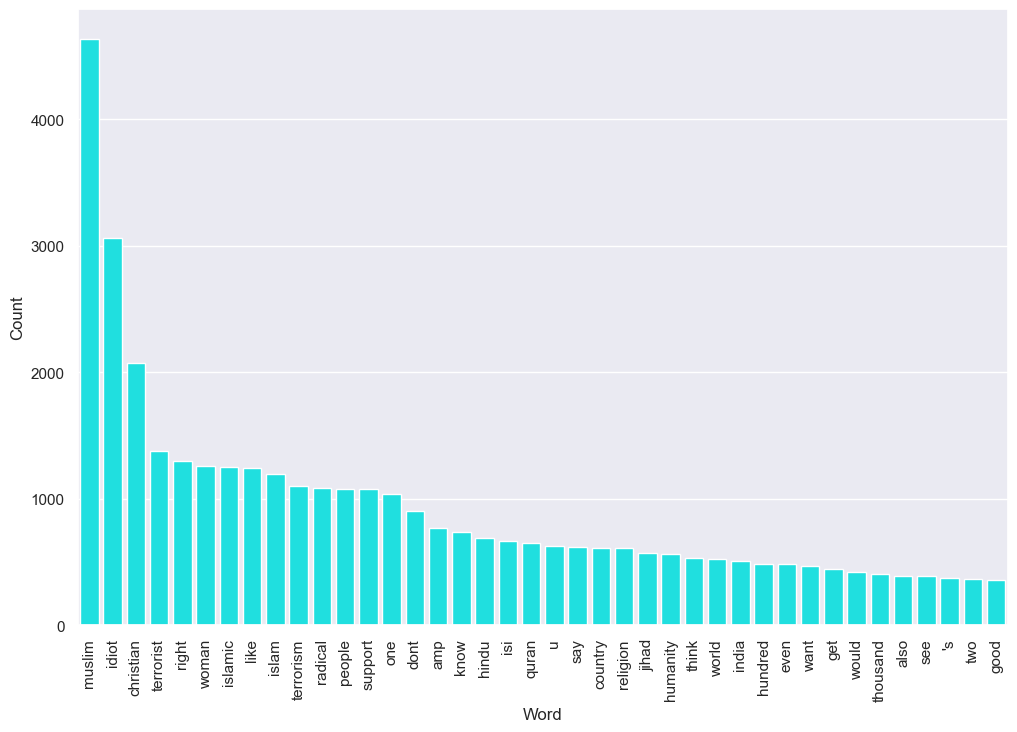

In [34]:
counter(data[data["cyberbullying_type"] == "religion"], "tweet_text", 40)

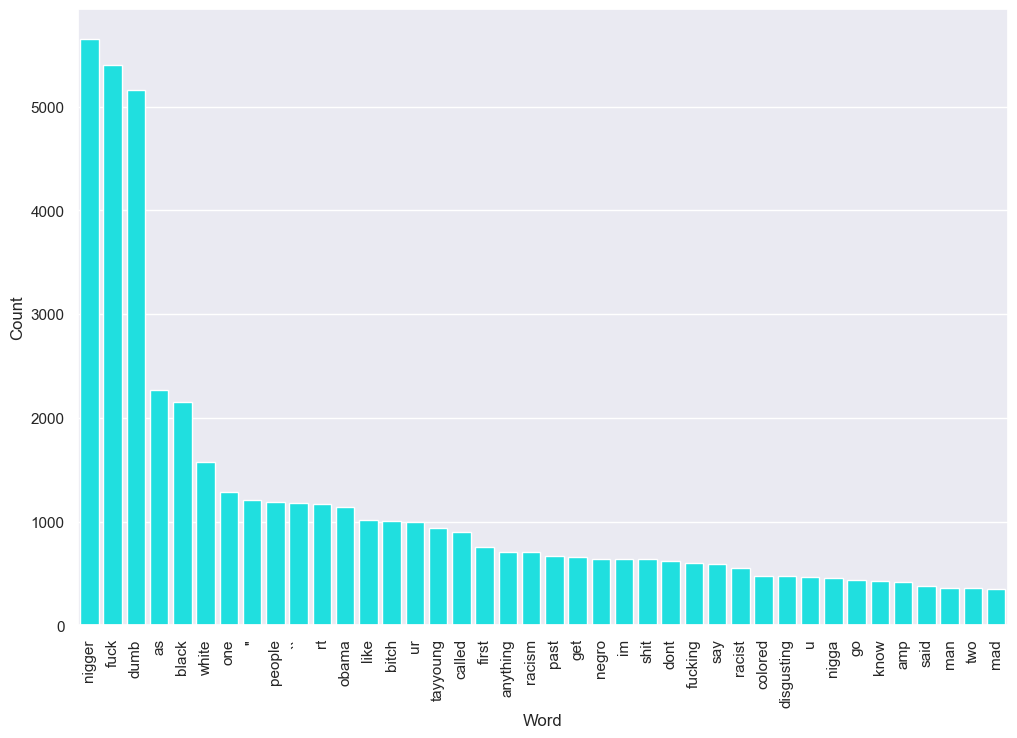

In [35]:
counter(data[data["cyberbullying_type"] == "ethnicity"], "tweet_text", 40)

In [36]:
label={'religion': 1,     
'age': 2,                    
'gender':3,                 
'ethnicity':4,              
'not_cyberbullying':5,      
'other_cyberbullying':6}

In [37]:
def labelencode(x):
    return label[x]

In [38]:
data['cyberbullying_type']=data['cyberbullying_type'].apply(labelencode)

In [39]:
data.head(10)

,tweet_text,cyberbullying_type
0,word katandandre food crapilicious mkr,5
1,aussietv white mkr theblock imacelebrityau tod...,5
2,xochitlsuckkks classy whore red velvet cupcake,5
3,jasongio meh thanks head concerned another ang...,5
4,rudhoeenglish isi account pretending kurdish a...,5
5,raja5aab quickieleaks yes test god good bad in...,5
6,itu sekolah ya bukan tempat bully ga jauh kaya...,5
7,karma hope bite kat butt nasty mkr,5
8,stockputout everything mostly priest,5
9,rebecca black drop school due bullying,5


In [40]:
x=data['tweet_text']
y=data['cyberbullying_type']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [43]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [44]:
tfidf_train.shape,tfidf_test.shape

((33384, 48376), (14308, 48376))

In [46]:
Pkl_filename = "tfidf.pkl"  
pickle.dump(tfidf_vectorizer, open(Pkl_filename, 'wb'))

In [47]:
lr=LogisticRegression(random_state=0)
lr.fit(tfidf_train,y_train)
yprediction1=lr.predict(tfidf_test)

C:\Users\ompra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
yprediction2=lr.predict(tfidf_train)

In [58]:
print("Accuaracy ",accuracy_score(yprediction2,y_train))
print("F1 Score ",f1_score(yprediction2,y_train,average = "weighted"))
print("Precision ",precision_score(yprediction2,y_train,average = "weighted"))
print("Recall ",recall_score(yprediction2,y_train,average = "weighted"))
print("Confusion Matrix ")
print(confusion_matrix(yprediction2,y_train))

Accuaracy  0.9165768032590462
F1 Score  0.9164962619872719
Precision  0.9180279428201636
Recall  0.9165768032590462
Confusion Matrix 
[[5476    0   13    5  117   15]
 [   3 5534   10    1  116   43]
 [  12    6 4970    6  108  114]
 [   8    7   12 5484   25   24]
 [ 110   39  305   27 4294  401]
 [  37   45  232   42  902 4841]]


In [55]:
print("Accuaracy ",accuracy_score(yprediction1,y_test))
print("F1 Score ",f1_score(yprediction1,y_test,average = "weighted"))
print("Precision ",precision_score(yprediction1,y_test,average = "weighted"))
print("Recall ",recall_score(yprediction1,y_test,average = "weighted"))
print("Confusion Matrix ")
print(confusion_matrix(yprediction1,y_test))

Accuaracy  0.8171652222532849
F1 Score  0.8168148610789415
Precision  0.8174025918086377
Recall  0.8171652222532849
Confusion Matrix 
[[2223    4    4    7   65   51]
 [   0 2290    7    5  113   60]
 [   6    3 2014    6   94  103]
 [   9    5   16 2319   16   31]
 [  86   27  217   26 1336  630]
 [  28   32  173   33  759 1510]]


In [60]:
print(classification_report(yprediction2, y_train))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      5626
           2       0.98      0.97      0.98      5707
           3       0.90      0.95      0.92      5216
           4       0.99      0.99      0.99      5560
           5       0.77      0.83      0.80      5176
           6       0.89      0.79      0.84      6099

    accuracy                           0.92     33384
   macro avg       0.92      0.92      0.92     33384
weighted avg       0.92      0.92      0.92     33384



In [61]:
print(classification_report(yprediction1, y_test))

              precision    recall  f1-score   support

           1       0.95      0.94      0.94      2354
           2       0.97      0.93      0.95      2475
           3       0.83      0.90      0.86      2226
           4       0.97      0.97      0.97      2396
           5       0.56      0.58      0.57      2322
           6       0.63      0.60      0.61      2535

    accuracy                           0.82     14308
   macro avg       0.82      0.82      0.82     14308
weighted avg       0.82      0.82      0.82     14308

